## information 
- Name = **Abu Ubaida**
- Gmail = **abuubaida901@gmail.com**


## What are you to do?
- Ahmed is a customer of Sastaticket.pk. He is planning to fly from Karachi to Islamabad for his
brother’s wedding and is currently in the process of choosing tickets. Ahmed has to go to
Islamabad but Ahmed also wants to save some money in the process, so he chooses to wait
instead of buy now, simply because ticket prices are just too high.
- Is this the right decision? Won’t ticket prices increase in the future? Perhaps there is a
sweet-spot Ahmed is hoping to find and maybe he just might find it.
- This is the problem that you will be tackling in this competition. Can you predict future prices
accurately to such a degree that you can now tell Ahmed - with confidence - that he has made
the wrong decision.
- Your task boils down to generating optimal predictions for flight prices of multiple airlines. If
successful, your model will contribute greatly to Sastaticket’s rich and diverse set of operating
algorithms.

- How will participants do it?
Sastaticket will provide you with a train/test dataset. This synthetic dataset contains records
which act as search data. For example, if someone wants to come on to Sastaticket’s website and
search for a flight, this data would be recorded.
Dataset X includes the following features:
- f1: Ticket Purchase Date Time
- f2: Origin
- f3: Destination
- f4: Departure Date Time
- f5: Arrival Date Time
- f6: Airline
- f7: Refundable Ticket
- f8: Baggage Weight
- f9: Baggage Pieces
- f10: Flight Number
### Dataset Y will have the following variables:
- Target

- Using these features, you are expected to generate valuable insights through in-depth data
analysis. Supplement your analysis with the appropriate diagrams and make sure to dig deep
into the data as there is a lot to discover!
- After conducting the exploratory analysis, you will be required to leverage these insights to
generate new features. The features you engineer will be pivotal in either making or breaking
your model.
- Finally, You are expected to create a model that will output predictions against a datetime index.
- The evaluation metric will be Root Mean Squared Error (RMSE). This metric will be used to
evaluate the performance of your model as well as decide your position in the leaderboard.
However, RMSE is not the sole metric through which the winner will be determined.
- Please keep in mind that you are required to document your journey throughout the competition.
- The documentation should include the explanation of your thought process, think of it as a
journal in which you are brainstorming and a journal we are very interested in!
- The winning participant/team will be decided after a thorough evaluation of the documentation,
the EDA, the final RMSE score and the efficiency of the code.
Note: There will be an extra column ‘Unnamed’ Please remove that.

# EXploratory Data Anlysis:

In [248]:
# we will extract information from our data 
#1- import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [249]:
df1 = pd.read_csv("/home/abuubaida01/Desktop/ML_chilla/Notebooks/sastaticket_train.csv")
df1.head()

df2 = pd.read_csv("/home/abuubaida01/Desktop/ML_chilla/Notebooks/sastaticket_test.csv")
df2.head()

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,2694449,2021-09-16 12:20:01.578279+00:00,x,y,2021-10-03 04:40:00+00:00,2021-10-03 06:40:00+00:00,omega,True,20.0,1,d-1
1,3088556,2021-09-18 20:13:13.612131+00:00,x,y,2021-09-23 17:05:00+00:00,2021-09-23 19:05:00+00:00,omega,True,20.0,1,d-5
2,3914899,2021-09-24 17:53:41.424953+00:00,x,y,2021-11-10 13:00:00+00:00,2021-11-10 15:00:00+00:00,alpha,True,20.0,1,a-9
3,1139859,2021-09-07 19:39:07.182848+00:00,x,y,2021-09-13 05:00:00+00:00,2021-09-13 06:55:00+00:00,beta,True,40.0,0,b-1
4,594648,2021-09-05 03:48:20.099555+00:00,x,y,2021-09-22 04:00:00+00:00,2021-09-22 06:00:00+00:00,alpha,True,20.0,1,a-1


In [250]:
df1.shape
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    5000 non-null   int64  
 1   Unnamed: 0.1  5000 non-null   int64  
 2   f1            5000 non-null   object 
 3   f2            5000 non-null   object 
 4   f3            5000 non-null   object 
 5   f4            5000 non-null   object 
 6   f5            5000 non-null   object 
 7   f6            5000 non-null   object 
 8   f7            5000 non-null   bool   
 9   f8            5000 non-null   float64
 10  f9            5000 non-null   int64  
 11  f10           5000 non-null   object 
 12  Unnamed: 0.2  5000 non-null   int64  
 13  target        5000 non-null   float64
dtypes: bool(1), float64(2), int64(4), object(7)
memory usage: 512.8+ KB


In [251]:
# let's check nullity of data 
df1.isnull().sum()

Unnamed: 0      0
Unnamed: 0.1    0
f1              0
f2              0
f3              0
f4              0
f5              0
f6              0
f7              0
f8              0
f9              0
f10             0
Unnamed: 0.2    0
target          0
dtype: int64

In [252]:
# let's first check the useful features
df1.head(10)

# I will drop Unnamed;x & y, as i need to predict upon time so don't need them; flight no.
df1.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.2', 'f2','f3','f10'], axis=1, inplace=True)
df2.drop(['Unnamed: 0', 'f2','f3','f10'], axis=1, inplace=True)


In [253]:
df2.head()

df1.head()

,f1,f4,f5,f6,f7,f8,f9,target
0,2021-01-08 12:43:27.828728+00:00,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,7400.0
1,2021-07-01 04:45:11.397541+00:00,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,15377.0
2,2021-06-24 11:28:47.565115+00:00,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,6900.0
3,2021-06-05 11:09:48.655927+00:00,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,9707.0
4,2021-07-29 09:53:51.065306+00:00,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,6500.0


### let's first change their name 


In [254]:

df1.rename(columns={'f1':'buying dt', 'f4':'Departure dt', 'f5':'Arrival dt', 'f6':'Airline','f7':'Refundable','f8':'Baggage w','f9':'Baggage p'}, inplace =True)
df2.rename(columns={'f1':'buying dt', 'f4':'Departure dt', 'f5':'Arrival dt', 'f6':'Airline','f7':'Refundable','f8':'Baggage w','f9':'Baggage p'}, inplace=True)


In [255]:
df1.head()
# df1.info()

,buying dt,Departure dt,Arrival dt,Airline,Refundable,Baggage w,Baggage p,target
0,2021-01-08 12:43:27.828728+00:00,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,7400.0
1,2021-07-01 04:45:11.397541+00:00,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,15377.0
2,2021-06-24 11:28:47.565115+00:00,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,6900.0
3,2021-06-05 11:09:48.655927+00:00,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,9707.0
4,2021-07-29 09:53:51.065306+00:00,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,6500.0


### converting into DateTime 

In [256]:
from datetime import datetime
df1['Departure dt'] = pd.to_datetime(df1['Departure dt'])
df1['Arrival dt'] = pd.to_datetime(df1['Arrival dt'])
df1['buying dt'] = pd.to_datetime(df1['buying dt'])


# for testing data

df2['Departure dt'] = pd.to_datetime(df2['Departure dt'])
df2['Arrival dt'] = pd.to_datetime(df2['Arrival dt'])
df2['buying dt'] = pd.to_datetime(df2['buying dt'])

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   buying dt     5000 non-null   datetime64[ns, UTC]
 1   Departure dt  5000 non-null   datetime64[ns, UTC]
 2   Arrival dt    5000 non-null   datetime64[ns, UTC]
 3   Airline       5000 non-null   object             
 4   Refundable    5000 non-null   bool               
 5   Baggage w     5000 non-null   float64            
 6   Baggage p     5000 non-null   int64              
 7   target        5000 non-null   float64            
dtypes: bool(1), datetime64[ns, UTC](3), float64(2), int64(1), object(1)
memory usage: 278.4+ KB


## Making New Features

In [257]:
df1.head()
df1.insert(0,'waiting',((df1['Departure dt'] - df1['buying dt']).astype('timedelta64[s]')),True)
df1.insert(0,'travelling ',((df1['Arrival dt']- df1['Departure dt']).astype('timedelta64[s]')),True)

df1.head()
df2.insert(0,'waiting',((df2['Departure dt']- df2['buying dt']).astype('timedelta64[s]')),True)
df2.insert(0,'travelling ',((df2['Arrival dt']- df2['Departure dt']).astype('timedelta64[s]')),True)

df2.head()

,travelling,waiting,buying dt,Departure dt,Arrival dt,Airline,Refundable,Baggage w,Baggage p
0,7200.0,1441198.0,2021-09-16 12:20:01.578279+00:00,2021-10-03 04:40:00+00:00,2021-10-03 06:40:00+00:00,omega,True,20.0,1
1,7200.0,420706.0,2021-09-18 20:13:13.612131+00:00,2021-09-23 17:05:00+00:00,2021-09-23 19:05:00+00:00,omega,True,20.0,1
2,7200.0,4043178.0,2021-09-24 17:53:41.424953+00:00,2021-11-10 13:00:00+00:00,2021-11-10 15:00:00+00:00,alpha,True,20.0,1
3,6900.0,465652.0,2021-09-07 19:39:07.182848+00:00,2021-09-13 05:00:00+00:00,2021-09-13 06:55:00+00:00,beta,True,40.0,0
4,7200.0,1469499.0,2021-09-05 03:48:20.099555+00:00,2021-09-22 04:00:00+00:00,2021-09-22 06:00:00+00:00,alpha,True,20.0,1


## now let's remove these useless columns

In [258]:
df2.drop(['buying dt','Departure dt','Arrival dt'], axis=1, inplace=True)
df1.drop(['buying dt','Departure dt','Arrival dt'], axis=1, inplace=True)

df2.head()

df1.head()

,travelling,waiting,Airline,Refundable,Baggage w,Baggage p,target
0,7200.0,1268192.0,gamma,True,0.0,0,7400.0
1,7200.0,29688.0,alpha,True,35.0,1,15377.0
2,7200.0,3033072.0,gamma,True,20.0,1,6900.0
3,7200.0,363011.0,alpha,True,15.0,1,9707.0
4,6900.0,2142368.0,beta,True,20.0,0,6500.0


## let's start plotting 

/home/abuubaida01/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/abuubaida01/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/abuubaida01/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

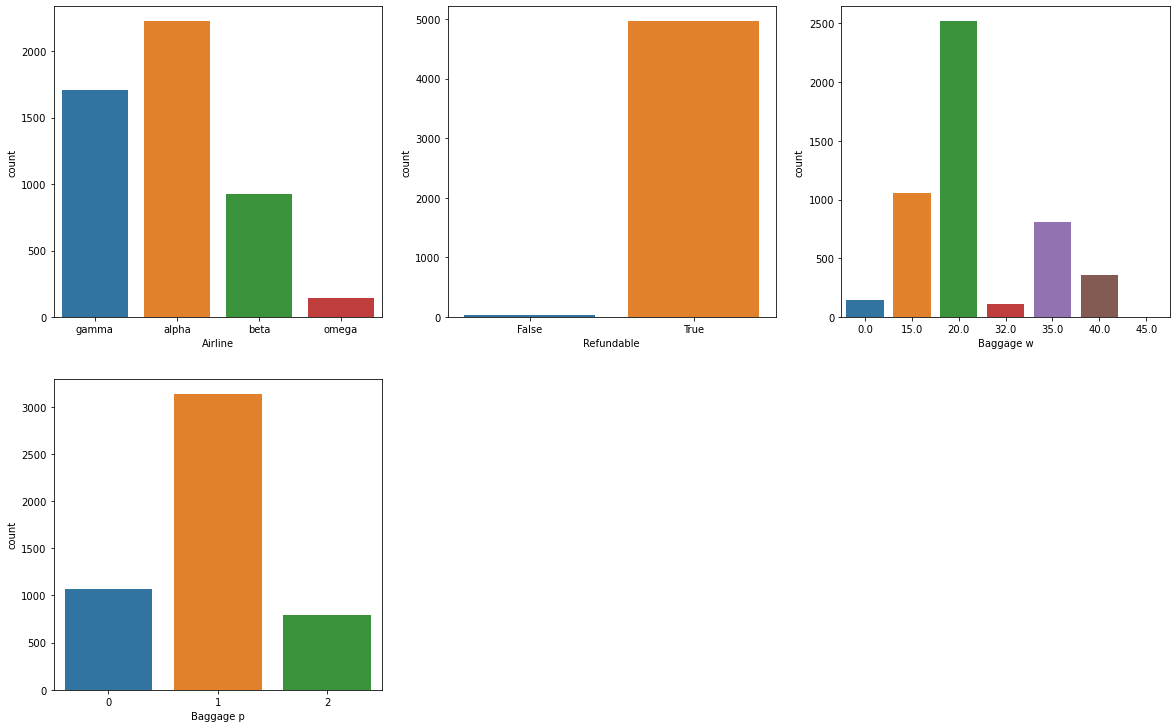

In [259]:
cat = list(df1.iloc[:, 2:-1])
p=1


plt.figure(figsize=(20,40))
for i in cat:
   plt.subplot(6,3,p)
   sns.countplot(df1[i])
   p+=1
plt.show()


## chicking the normality of Numeric features

stat=0.617, p=0.000
Probably not Gaussian nor normal distribution


/home/abuubaida01/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/home/abuubaida01/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


travelling  
: ----------------------------
stat=0.661, p=0.000
Probably not Gaussian nor normal distribution
waiting 
: ----------------------------


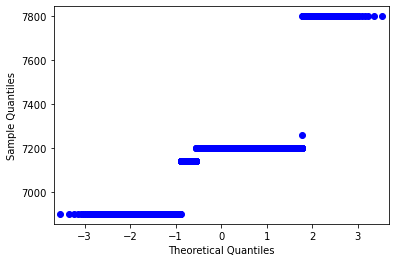

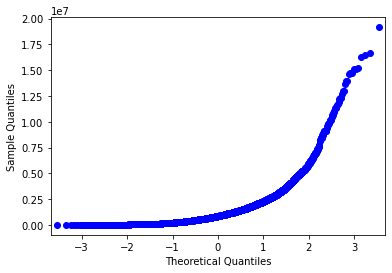

In [260]:
## let's check with shapiro wilk test

from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
def nor(i):
	stat, p = shapiro(df1[i])
	print('stat=%.3f, p=%.3f' % (stat, p))

	# make a coditional argument for further use
	if p > 0.05:
		print('Probably Gaussian or Normal Distribution')
	else:
		print('Probably not Gaussian nor normal distribution')
	qqplot(df1[i])
	print(i,'\n: ----------------------------')

num = list(df1.iloc[:, 0:2])
for i in num:
	nor(i)


## let's make dummies value with the help of sklearn


In [261]:
from sklearn.preprocessing import LabelEncoder as le
cat = list(df1.iloc[:,2:-1])
for i in cat:
   df1[i]=le().fit_transform(df1[i])
   df2[i]=le().fit_transform(df2[i])


In [262]:
df1.head()

,travelling,waiting,Airline,Refundable,Baggage w,Baggage p,target
0,7200.0,1268192.0,2,1,0,0,7400.0
1,7200.0,29688.0,0,1,4,1,15377.0
2,7200.0,3033072.0,2,1,2,1,6900.0
3,7200.0,363011.0,0,1,1,1,9707.0
4,6900.0,2142368.0,1,1,2,0,6500.0


In [263]:
df1.describe()

,travelling,waiting,Airline,Refundable,Baggage w,Baggage p,target
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,7159.836000,1.349212e+06,0.953400,0.992800,2.292000,0.944600,10104.351800
std,169.613345,1.679384e+06,0.948371,0.084555,1.247817,0.607951,3359.936118
min,6900.000000,2.003000e+03,0.000000,0.000000,0.000000,0.000000,4990.000000
25%,7140.000000,3.606870e+05,0.000000,1.000000,2.000000,1.000000,7796.000000
50%,7200.000000,8.634945e+05,1.000000,1.000000,2.000000,1.000000,9403.000000
75%,7200.000000,1.698816e+06,2.000000,1.000000,3.000000,1.000000,11245.000000
max,7800.000000,1.916464e+07,3.000000,1.000000,6.000000,2.000000,33720.000000


In [264]:
# from sklearn.preprocessing import StandardScaler as se
# # as our data is not normal so let's scale it
# for i in num:
#    df1[i]=se().fit_transform(df1[[i]])
#    if i=="target":
#       continue
#       df2[i]=se().fit_transform(df2[[i]])

# df1.head()

# it is better to not scale this data, as result is not interpreting properly

In [265]:
df2.head()

,travelling,waiting,Airline,Refundable,Baggage w,Baggage p
0,7200.0,1441198.0,3,0,1,1
1,7200.0,420706.0,3,0,1,1
2,7200.0,4043178.0,0,0,1,1
3,6900.0,465652.0,1,0,2,0
4,7200.0,1469499.0,0,0,1,1


## Let's make Model

In [266]:
## as our data is regression category
from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.svm import SVR 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
lr = LinearRegression()
kr = KNeighborsRegressor()
dt = DecisionTreeRegressor()
svr = SVR()

# rms = mean_absolute_error(y_test, y_pred,squared= False)


In [267]:
df1.head()

,travelling,waiting,Airline,Refundable,Baggage w,Baggage p,target
0,7200.0,1268192.0,2,1,0,0,7400.0
1,7200.0,29688.0,0,1,4,1,15377.0
2,7200.0,3033072.0,2,1,2,1,6900.0
3,7200.0,363011.0,0,1,1,1,9707.0
4,6900.0,2142368.0,1,1,2,0,6500.0


In [268]:
# model loop
x = df1.iloc[:, :-1]
# X.head()
y = df1.iloc[:, -1:]
# print(y)

## modeling 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

algos = [lr, kr, dt, svr]
for i in algos:
   i.fit(x_train, y_train)
   pred = i.predict(x_test)
   test_s = r2_score(y_test, pred)
   train_s = r2_score(y_train, i.predict(x_train))
   if abs(train_s - test_s) <= 0.1:
      print(i)
      print('R2 score is = ',r2_score(y_test, pred))
      print('mean absolute error is =', mean_absolute_error(y_test, pred))
      print("mean squared error is = ", mean_squared_error(y_test,pred, squared=True))

LinearRegression()
R2 score is =  0.07116557879471863
mean absolute error is = 2359.2739973040752
mean squared error is =  12012521.575468129


/home/abuubaida01/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()
R2 score is =  -0.04126893580186275
mean absolute error is = 2377.6147100267203
mean squared error is =  13466625.774864739


## prediction 

In [272]:
model = LinearRegression().fit(x,y)
prediction = model.predict(df2)
prediction = pd.DataFrame(prediction)
prediction.index= df2.index
prediction.columns = ['Prediction']

prediction.to_csv('Prediction Result')

-----
------
----